In [73]:
#!pip install praw
#!pip install python-dotenv
#!pip install textblob tabulate
#!pip install vaderSentiment
#!pip install wordcloud


In [78]:
import praw
import pandas as pd
from datetime import datetime as dr
from dotenv import load_dotenv
from os import getenv
import matplotlib.pyplot as plt 

from textblob import TextBlob
from tabulate import tabulate

from praw.models import MoreComments
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [41]:
from dotenv import load_dotenv

# Specify the path to your .env file
dotenv_path = '/Users/AW/Desktop/.env'

# Load the environment variables from the .env file
load_dotenv(dotenv_path)

# Now I can access the environment variables
import os

app_name = os.getenv('APP_NAME')
app_id = os.getenv('APP_ID')
app_secret = os.getenv('APP_SECRET')
reddit_username = os.getenv('REDDIT_USERNAME')
reddit_password = os.getenv('REDDIT_PASSWORD')



In [42]:
print(reddit.read_only)

True


In [43]:
reddit = praw.Reddit(
    client_id=getenv("APP_ID"), # Right below 'personal use script'
    client_secret=getenv("APP_SECRET"), # secret
    user_agent=f"pda-2023 u/{getenv('USERNAME')}", # app-name u/username
)

In [44]:
subreddit = reddit.subreddit("Python")

In [70]:
# Initialize PRAW with my credentials
reddit = praw.Reddit(client_id=app_id, client_secret=app_secret, user_agent=f"script by u/{reddit_username}")

# Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

#what we want to analyze example Dublin
subreddit_name = 'Dublin'

# Function to fetch posts and analyze sentiments
def fetch_and_analyze_sentiments(subreddit_name, limit=10):
    subreddit = reddit.subreddit(subreddit_name)
    posts_data = []

    for post in subreddit.hot(limit=limit):
        # Analyzing sentiment of the post title
        post_sentiment = analyzer.polarity_scores(post.title)
        posts_data.append(['Post', post.title, post_sentiment['compound']])

        #Fetching and analyzing comments
        post.comments.replace_more(limit=0)  
        for comment in post.comments.list():
            if isinstance(comment, praw.models.MoreComments):
                continue
            comment_sentiment = analyzer.polarity_scores(comment.body)
            posts_data.append(['Comment', comment.body, comment_sentiment['compound']])

    return pd.DataFrame(posts_data, columns=['Type', 'Text', 'Sentiment'])



In [71]:
# Fetch and analyze sentiments
sentiment_data = fetch_and_analyze_sentiments(subreddit_name, limit=20)

# Display the first 20 rows of the sentiment data
print(sentiment_data.head(20))

#Now we see it's working, let's try it with the public transport 

       Type                                               Text  Sentiment
0      Post  MOD NOTE: Posts that have little or no relevan...    -0.2315
1   Comment  The "salaries needed to live in Dublin" thread...    -0.1280
2   Comment  If I post nothing but musings on Tallaght, doe...     0.0000
3   Comment  So, instead of "what are your salaries?" we ne...     0.0000
4   Comment  Can we also put a ban on misinformation?\n\nGe...    -0.7783
5   Comment  But how will we find out which pub shows the F...     0.0000
6   Comment  Hi, I lost something at coppers last night and...    -0.0772
7   Comment                    Bit of sand in the vagina I see     0.0000
8   Comment  My latest comment - marked as “spam” for being...     0.1783
9   Comment  Positively encouraged. \n\nPlease focus on the...     0.8020
10  Comment                                        Up jobstown     0.0000
11  Comment  Or you could just not start a boring salary th...     0.5365
12  Comment  Those can be annoying but

In [87]:
# Initialize PRAW with your credentials
reddit = praw.Reddit(client_id=app_id, client_secret=app_secret, user_agent=f"script by u/{reddit_username}")

# Subreddits related to Dublin public transport
subreddit_names = ['dublin', 'ireland']  # Add other relevant subreddits if needed

# Initialize the sentiment analyzers
textblob_analyzer = TextBlob
vader_analyzer = SentimentIntensityAnalyzer()

# Keywords related to public transport in Dublin
transport_keywords = ['public transport', 'bus', 'tram', 'luas', 'dublin bus', 'transport']

# Function to fetch posts and analyze sentiments
def fetch_and_analyze_sentiments(subreddit_names, total_limit=1000):
    analyzed_data = []
    count = 0

    for subreddit_name in subreddit_names:
        subreddit = reddit.subreddit(subreddit_name)

        for post in subreddit.hot(limit=total_limit):
            title_lower = post.title.lower()
            # Check for transport-related keywords in title (case-insensitive)
            if any(keyword in title_lower for keyword in transport_keywords):
                count += 1
                post_blob = textblob_analyzer(post.title)
                post_vader = vader_analyzer.polarity_scores(post.title)
                analyzed_data.append(['Post', post.title, post_blob.sentiment.polarity, post_blob.sentiment.subjectivity, post_vader['compound']])

            if count >= total_limit:
                break

        if count >= total_limit:
            break

    return analyzed_data

# Fetch and analyze sentiments
try:
    sentiment_data = fetch_and_analyze_sentiments(subreddit_names, total_limit=1000)
    # Display the results using Tabulate
    if sentiment_data:
        print(tabulate(sentiment_data, headers=['Type', 'Text', 'TextBlob Polarity', 'TextBlob Subjectivity', 'VADER Compound Score']))
    else:
        print("No relevant posts or comments found.")
except Exception as e:
    print(f"An error occurred: {e}")

# Classifying sentiments as positive, neutral, and negative
positive = len([s for s in sentiment_data if s[4] > 0.05])
neutral = len([s for s in sentiment_data if -0.05 <= s[4] <= 0.05])
negative = len([s for s in sentiment_data if s[4] < -0.05])



Type    Text                                                                                                                                                                                            TextBlob Polarity    TextBlob Subjectivity    VADER Compound Score
------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  -------------------  -----------------------  ----------------------
Post    Clongriffin busconnects corridor given planning approval                                                                                                                                                0                        0                          0.4767
Post    Green Line Luas problem                                                                                                                                                                        

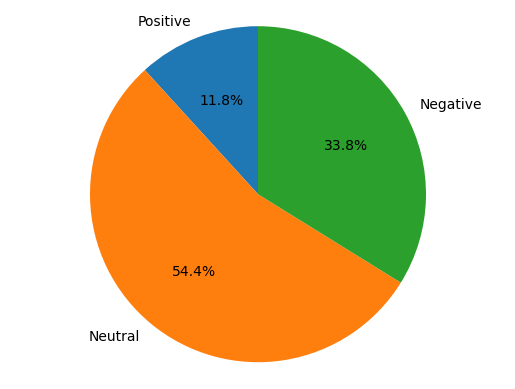

In [86]:
# Plotting the results

# This espesific analysis is from 1000 post 
labels = 'Positive', 'Neutral', 'Negative'
sizes = [positive, neutral, negative]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


TextBlob is a simpler tool quite effective for basic sentiment analysis. It gives a polarity score (ranging from -1 to 1, where -1 is negative, 0 is neutral, and 1 is positive) 

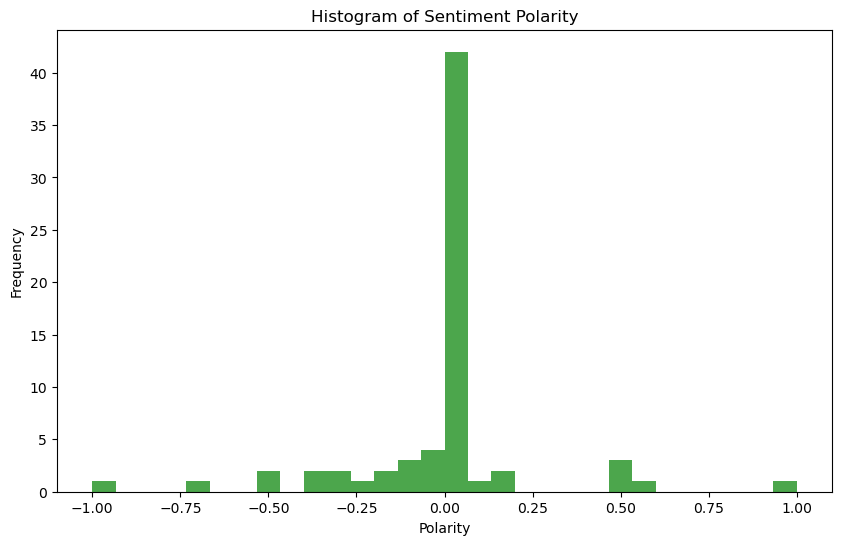

In [80]:
# Histogram of Sentiment Polarity
polarities = [s[2] for s in sentiment_data]  # Assuming the third element is the TextBlob polarity
plt.figure(figsize=(10, 6))
plt.hist(polarities, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()



This shows the frequency of different sentiment polarity scores.

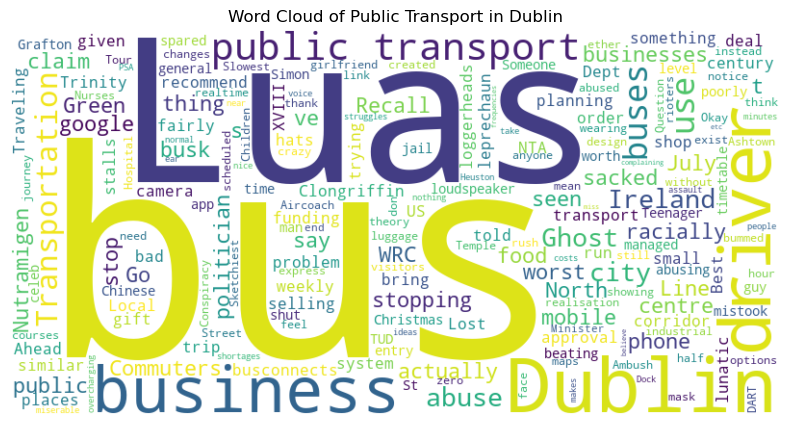

In [81]:
# Word Cloud
# Combine all texts into a single string
all_text = ' '.join([s[1] for s in sentiment_data])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Public Transport in Dublin')
plt.axis('off')
plt.show()



Word Cloud:the most frequent words used in the posts and comments.